In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
import numpy as np

In [19]:
train = pd.read_csv('real_final_train.csv')
train.keys()

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'meal_type_1',
       'meal_type_2', 'meal_type_3', 'meal_type_4', 'room_type_1',
       'room_type_2', 'room_type_3', 'room_type_4', 'room_type_5',
       'room_type_6', 'room_type_7', 'Corporate', 'Complementary', 'Online',
       'Offline', 'Aviation', 'lead_time_under_iqr_1', 'lead_time_under_iqr_2',
       'lead_time_under_iqr_3', 'lead_time_under_iqr_4', 'price_under_iqr_1',
       'price_under_iqr_2', 'price_under_iqr_3', 'price_under_iqr_4',
       'lead_time_norm', 'price_norm', 'week', 'weekend'],
      dtype='obje

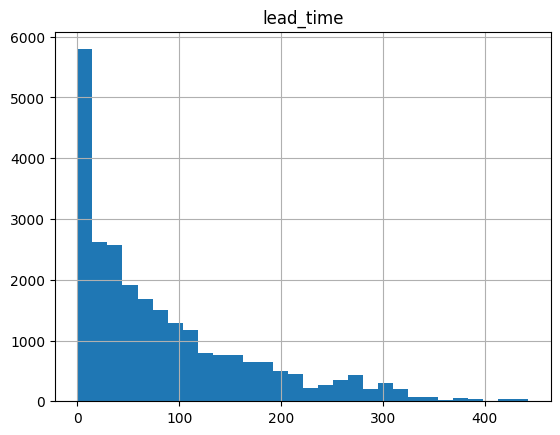

In [20]:
plt.title("lead_time")
train["lead_time"].hist(bins=30);

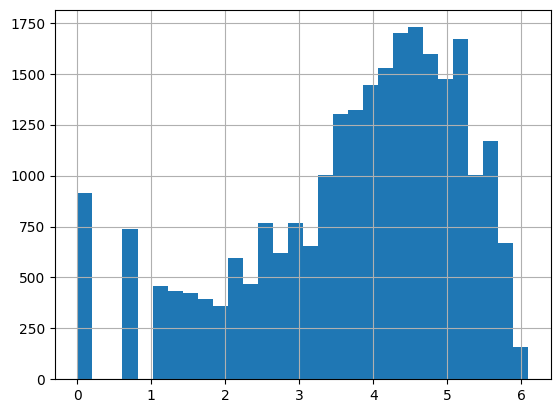

In [22]:
np.log1p(train["lead_time"]).hist(bins=30);

In [23]:
print(train['lead_time'])

0        200
1         79
2         78
3         61
4        201
        ... 
25362     43
25363    102
25364      5
25365    213
25366     14
Name: lead_time, Length: 25367, dtype: int64


count    25367.000000
mean       103.245794
std         34.104010
min          0.000000
50%         99.900000
75%        120.165000
90%        147.900000
95%        165.000000
99%        207.900000
max        209.000000
Name: avg_price_per_room, dtype: float64

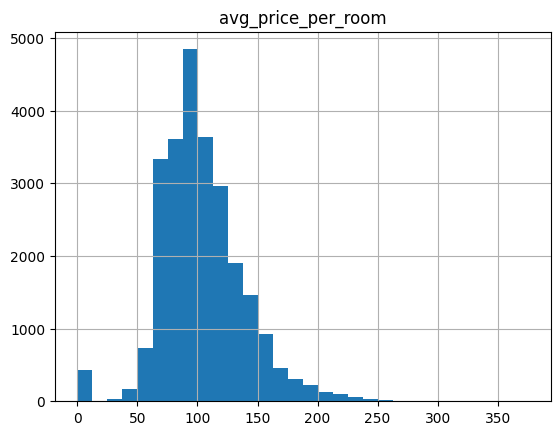

In [25]:
plt.title("avg_price_per_room")
train["avg_price_per_room"].hist(bins=30);
train["avg_price_per_room"].describe(percentiles=[.5, .75, .9, .95, .99])
train["avg_price_per_room"].apply(lambda x: 209 if x>209 else x).describe(percentiles=[.5, .75, .9, .95, .99])

In [26]:
train["lead_time"] = np.log1p(train["lead_time"])
train["avg_price_per_room/"] = train["avg_price_per_room"].apply(lambda x: 209 if x>209 else x)

train["lead_time__cut"] = pd.cut(train["lead_time"], 15, labels=[f"lead_time__{i}" for i in range(1,16)])
train["avg_price_per_room__cut"] = pd.cut(train["avg_price_per_room"], 11, labels=[f"avg_price_per_room__{i}" for i in range(1,12)])

In [27]:
X_log_2_dummy = [
    pd.get_dummies(train["lead_time__cut"], prefix="lead_time", prefix_sep='__', drop_first=True),
    pd.get_dummies(train["avg_price_per_room__cut"], prefix="avg_price_per_room", prefix_sep='__', drop_first=True)
]
train = pd.concat([train.drop(["lead_time", "lead_time__cut", "avg_price_per_room__cut"], axis=1)] + X_log_2_dummy, axis=1)

In [28]:
train.keys()

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'arrival_year',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'meal_type_1',
       'meal_type_2', 'meal_type_3', 'meal_type_4', 'room_type_1',
       'room_type_2', 'room_type_3', 'room_type_4', 'room_type_5',
       'room_type_6', 'room_type_7', 'Corporate', 'Complementary', 'Online',
       'Offline', 'Aviation', 'lead_time_under_iqr_1', 'lead_time_under_iqr_2',
       'lead_time_under_iqr_3', 'lead_time_under_iqr_4', 'price_under_iqr_1',
       'price_under_iqr_2', 'price_under_iqr_3', 'price_under_iqr_4',
       'lead_time_norm', 'price_norm', 'week', 'weekend',
       'avg_price_per_room/', '

In [35]:
train = pd.read_csv('kaggle_2.csv')
train.keys()

Index(['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'nights', 'lead_x_nights',
       'market_segment_type_Aviation', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'room_type_reserved_Room_Type 1',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'required_car_parking_space_0', 'required_car_parking_space_1'

In [50]:


# train = pd.read_csv('real_final_train.csv')
feature_names = ['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights',
       'lead_time', 
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'nights', 'lead_x_nights',
       'market_segment_type_Aviation', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'room_type_reserved_Room_Type 1',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'required_car_parking_space_0', 'required_car_parking_space_1']

X = train[feature_names]
y = train["booking_status"]

# Decision Tree 학습/예측/평가
X_train, X_test, y_train, y_test = train_test_split(X, y)

# LogisticRegression 학습/예측/평가
lr_model = LogisticRegression(C = 0.01, penalty = 'l2', solver ='lbfgs')
scores = cross_val_score(lr_model, X, y, cv=10)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))




c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Cross Validation Scores:  [0.79984208 0.80852744 0.80805687 0.79225908 0.79976303 0.80173776
 0.79541864 0.79581359 0.80055292 0.80529226]
Average CV Score:  0.8007263677123891
Number of CV Scores used in Average:  10


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [34]:
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\user\AppData\Local\Programs\Pyt

In [ ]:
best_clf.best_estimator_

In [11]:
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
# print('LogisticRegression 정확도: {0:.4f}'.format(
#     accuracy_score(y_test, lr_pred)))
print (f'Accuracy - : {best_clf.score(X,y):.3f}')


LogisticRegression 정확도: 0.7868


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
